# Lesson 3-pandas

# I. DataFrames

More detailed documentation is [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

Now we're going to take a big leap to dataframes. dataframes are extremely useful for representing data for statistical analyses. They take dictionaries and make them much more useful. Let's look at a dictionary with our information from before

In [2]:
names=['Winston','Jess','Nick','Schmidt']
heights=[5.0,5.5,6.0,5.8]
weights=[125.0,160.0,168.0,140.0]

people={'names':names,'heights':heights,'weights':weights}
print people

{'weights': [125.0, 160.0, 168.0, 140.0], 'names': ['Winston', 'Jess', 'Nick', 'Schmidt'], 'heights': [5.0, 5.5, 6.0, 5.8]}


In [4]:
people['heights']

[5.0, 5.5, 6.0, 5.8]

In [5]:
people['names'][0]

'Winston'

If we want all of Winston's data, we'd have to do this

In [3]:
print people['names'][0]
print people['heights'][0]
print people['weights'][0]

Winston
5.0
125.0


But dataframes make this easier. dataframes is part of a python package called pandas (which you already installed with jupyter). packages are repositories of python functions that you have to manually call upon using import

In [8]:
import pandas as pd # I will refer to pandas as pd for the rest of the code

# the period means that "in package pd, I want to use the function DataFrame()
people_df=pd.DataFrame(people,index=people['names'],columns=['names','heights','weights']) 
people_df

,names,heights,weights
Winston,Winston,5.0,125.0
Jess,Jess,5.5,160.0
Nick,Nick,6.0,168.0
Schmidt,Schmidt,5.8,140.0


In [7]:
import pandas as pd
pd.DataFrame(people,index=people['names'],columns=['heights','weights'])

,heights,weights
Winston,5.0,125.0
Jess,5.5,160.0
Nick,6.0,168.0
Schmidt,5.8,140.0


In [10]:
pd.DataFrame(people,index=people['names'],columns=['heights','weights'])

,heights,weights
Winston,5.0,125.0
Jess,5.5,160.0
Nick,6.0,168.0
Schmidt,5.8,140.0


In [6]:
import pandas as pd


<module 'pandas' from '/Users/timlew/anaconda/lib/python2.7/site-packages/pandas/__init__.pyc'>

pandas' DataFrame function automatically takes my dictionary and create this nice table. I did have to set the index argument to the people's names so I could name the rows and set the order of columns. Otherwise, I get generic number indices with columns in alphabetical order.

In [5]:
pd.DataFrame(people) 

,heights,names,weights
0,5.0,Winston,125.0
1,5.5,Jess,160.0
2,6.0,Nick,168.0
3,5.8,Schmidt,140.0


In [15]:
people_df=pd.DataFrame(people,index=people['names'],columns=['heights','weights'])
people_df

people_df.std()

heights     0.434933
weights    19.465782
dtype: float64

To give y'all an idea of why this is immediately useful, let's look at some of the functions we get for free with DataFrame

In [18]:
%matplotlib inline
# You need the above line in all of your scripts to make sure jupyter makes plots in the browser

print people_df['heights'].mean()
print people_df['heights'].std()
print '\n'
print people_df['heights'].describe()

5.575
0.434932945023


count    4.000000
mean     5.575000
std      0.434933
min      5.000000
25%      5.375000
50%      5.650000
75%      5.850000
max      6.000000
Name: heights, dtype: float64


In [10]:
people_df.describe()

,heights,weights
count,4.000000,4.000000
mean,5.575000,148.250000
std,0.434933,19.465782
min,5.000000,125.000000
25%,5.375000,136.250000
50%,5.650000,150.000000
75%,5.850000,162.000000
max,6.000000,168.000000


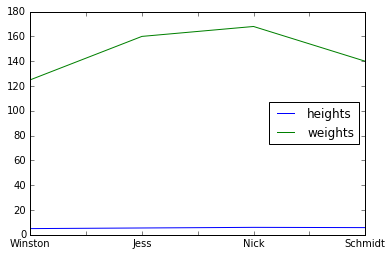

In [19]:
people_df.plot()

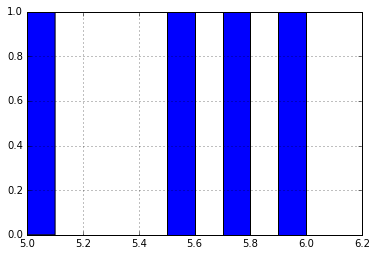

In [8]:
people_df['heights'].hist()

# II v2. Importing data

You usually won't manually enter data into a dictionary and then transform it into dataframe. Typically, the data will be stored somewhere as a csv (comma-separated values) or excel file. Download [this](https://data.cityofnewyork.us/api/views/kku6-nxdu/rows.csv?accessType=DOWNLOAD) csv file and then we can take a look at it. You can open it up in Excel if you'd like to see it. 

This dataset lists the demographics of different zip codes in New York. There's a bunch of freely available data at [data.gov](https://catalog.data.gov/)

Let's load this data into pandas and then take a look at it

In [12]:
demo_df=pd.read_csv('Demographic_Statistics_By_Zip_Code.csv')
demo_df.head() # head shows us the first five rows of the dataframe

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,1,100,0,0.00,1,1.00,0,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100


This summary gives us a peek into what kind of data is in our dataframe. But because it's a summary, it leaves out some information we might want like all the column names

In [13]:
demo_df.columns

Index([u'JURISDICTION NAME', u'COUNT PARTICIPANTS', u'COUNT FEMALE',
       u'PERCENT FEMALE', u'COUNT MALE', u'PERCENT MALE',
       u'COUNT GENDER UNKNOWN', u'PERCENT GENDER UNKNOWN',
       u'COUNT GENDER TOTAL', u'PERCENT GENDER TOTAL',
       u'COUNT PACIFIC ISLANDER', u'PERCENT PACIFIC ISLANDER',
       u'COUNT HISPANIC LATINO', u'PERCENT HISPANIC LATINO',
       u'COUNT AMERICAN INDIAN', u'PERCENT AMERICAN INDIAN',
       u'COUNT ASIAN NON HISPANIC', u'PERCENT ASIAN NON HISPANIC',
       u'COUNT WHITE NON HISPANIC', u'PERCENT WHITE NON HISPANIC',
       u'COUNT BLACK NON HISPANIC', u'PERCENT BLACK NON HISPANIC',
       u'COUNT OTHER ETHNICITY', u'PERCENT OTHER ETHNICITY',
       u'COUNT ETHNICITY UNKNOWN', u'PERCENT ETHNICITY UNKNOWN',
       u'COUNT ETHNICITY TOTAL', u'PERCENT ETHNICITY TOTAL',
       u'COUNT PERMANENT RESIDENT ALIEN', u'PERCENT PERMANENT RESIDENT ALIEN',
       u'COUNT US CITIZEN', u'PERCENT US CITIZEN',
       u'COUNT OTHER CITIZEN STATUS', u'PERCENT OTHER CI

And how many rows we have

In [15]:
len(demo_df) 

236

# IIa. Selecting rows and columns

pandas supports selecting rows and columns using brackets

In [14]:
demo_df_head=demo_df.head() # I'm saving just the first five lines so we don't get a lot of stuff printed out
demo_df_head['JURISDICTION NAME']

0    10001
1    10002
2    10003
3    10004
4    10005
Name: JURISDICTION NAME, dtype: int64

In [24]:
demo_df_head=demo_df.head()
demo_df_head['COUNT FEMALE']

0    22
1    19
2     1
3     0
4     2
Name: COUNT FEMALE, dtype: int64

Or you can get multiple columns out by giving the dataframe a list of column names

In [25]:
demo_df_head[['JURISDICTION NAME','COUNT FEMALE']]

,JURISDICTION NAME,COUNT FEMALE
0,10001,22
1,10002,19
2,10003,1
3,10004,0
4,10005,2


Or multiple rows

In [26]:
demo_df_head[0:2]

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100


pandas, however, encourages you to index information using the loc and iloc features. loc lets you index by names and ilocs lets you index by index number. It's usually better to use these functions because they force you to specify column and row indices; otherwise brackets can be kind of ambiguous (imagine what would happen if you had rows and columns with the same name).

Let's say we set our row labels to be the Jurisdiction Name

In [15]:
demo_df_head=demo_df_head.set_index(demo_df_head['JURISDICTION NAME'])
demo_df_head=demo_df_head.drop('JURISDICTION NAME',axis=1) # remove the column jurisdiction name
demo_df_head

,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,COUNT PACIFIC ISLANDER,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
JURISDICTION NAME,,,,,,,,,,,,,,,,,,,,,
10001,44,22,0.50,22,0.50,0,0,44,100,0,...,44,100,20,0.45,24,0.55,0,0,44,100
10002,35,19,0.54,16,0.46,0,0,35,100,0,...,35,100,2,0.06,33,0.94,0,0,35,100
10003,1,1,1.00,0,0.00,0,0,1,100,0,...,1,100,0,0.00,1,1.00,0,0,1,100
10004,0,0,0.00,0,0.00,0,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
10005,2,2,1.00,0,0.00,0,0,2,100,0,...,2,100,0,0.00,2,1.00,0,0,2,100


In [16]:
demo_df_head.loc[[10002,10003],['PERCENT FEMALE','COUNT FEMALE']]

,PERCENT FEMALE,COUNT FEMALE
JURISDICTION NAME,,
10002,0.54,19
10003,1.00,1


Now we can call rows and columns by their names using loc

In [58]:
demo_df_head.loc[[10001,10003],['COUNT PARTICIPANTS','COUNT US CITIZEN']]

,COUNT PARTICIPANTS,COUNT US CITIZEN
JURISDICTION NAME,,
10001,44,42
10003,1,1


But if we just wanted the first few rows or columns we could do something like

In [40]:
demo_df_head.iloc[1:3,0:3]

,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE
JURISDICTION NAME,,,
10002,35,19,0.54
10003,1,1,1.00


In [60]:
demo_df_head.iloc[0:4,0:3]

,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE
JURISDICTION NAME,,,
10001,44,22,0.50
10002,35,19,0.54
10003,1,1,1.00
10004,0,0,0.00


# IIIa. Creating new columns

Most analyses you will do are built on the idea of transforming your data (apply a function, combine two or more fields, etc.) and grouping it in some way (by subject, conditions, demographics) to identify structure. Some programming languages think about this in a map-reduce framework: You map (transform) your data in some way and then reduce (group and aggregate across) it.

You can use loc to create new columns in your dataframe. To demonstrate this, I'm going to look at a small subset of our data

In [41]:
race_df=demo_df_head.loc[:,['PERCENT ASIAN NON HISPANIC','PERCENT WHITE NON HISPANIC','PERCENT BLACK NON HISPANIC','PERCENT HISPANIC LATINO']]
race_df

,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT HISPANIC LATINO
JURISDICTION NAME,,,,
10001,0.07,0.02,0.48,0.36
10002,0.80,0.17,0.00,0.03
10003,1.00,0.00,0.00,0.00
10004,0.00,0.00,0.00,0.00
10005,0.50,0.00,0.50,0.00


Based on this data we can calculate how many people of other races (besides these) there are

In [46]:
awbh_sum=race_df.loc[:,'PERCENT ASIAN NON HISPANIC']+race_df.loc[:,'PERCENT WHITE NON HISPANIC']+\
race_df.loc[:,'PERCENT BLACK NON HISPANIC']+race_df.loc[:,'PERCENT HISPANIC LATINO']
print awbh_sum

JURISDICTION NAME
10001    0.93
10002    1.00
10003    1.00
10004    0.00
10005    1.00
dtype: float64


In [48]:
race_df.loc[:,'awbh']=awbh_sum
race_df

,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT HISPANIC LATINO,awbh
JURISDICTION NAME,,,,,
10001,0.07,0.02,0.48,0.36,0.93
10002,0.80,0.17,0.00,0.03,1.00
10003,1.00,0.00,0.00,0.00,1.00
10004,0.00,0.00,0.00,0.00,0.00
10005,0.50,0.00,0.50,0.00,1.00


In [68]:
awbh_sum=race_df.loc[:,'PERCENT ASIAN NON HISPANIC']+race_df.loc[:,'PERCENT WHITE NON HISPANIC']+\
race_df.loc[:,'PERCENT BLACK NON HISPANIC']+race_df.loc[:,'PERCENT HISPANIC LATINO']
awbh_sum

JURISDICTION NAME
10001    0.93
10002    1.00
10003    1.00
10004    0.00
10005    1.00
dtype: float64

In [71]:
race_df.loc[:,'AWBH']=awbh_sum
race_df

,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT HISPANIC LATINO,AWBH
JURISDICTION NAME,,,,,
10001,0.07,0.02,0.48,0.36,0.93
10002,0.80,0.17,0.00,0.03,1.00
10003,1.00,0.00,0.00,0.00,1.00
10004,0.00,0.00,0.00,0.00,0.00
10005,0.50,0.00,0.50,0.00,1.00


You can also use loc to create new rows, but you usually won't create new rows in a dataframe. By convention, columns are features and rows are observations so adding new rows is only going to happen when you get new data. If you reading data from a csv, then that usually has all the data collected.

## Problem

Here's a problem to work on. If you go back to our original dataframe, you can see that the field COUNT PARTICIPANTS lists the number of people polled in each district. But sometimes this number is ridicuously small (sometimes even 0). Create a new column called good_samp that contains True if there are more than 20 people and False otherwise

In [56]:
# your code here
demo_df_head.loc[:,'COUNT PARTICIPANTS']==0

JURISDICTION NAME
10001    False
10002    False
10003    False
10004     True
10005    False
Name: COUNT PARTICIPANTS, dtype: bool

In [20]:
demo_df_head.loc[:,'good_samp']=demo_df_head.loc[:,'COUNT PARTICIPANTS']>20
demo_df_head

,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,COUNT PACIFIC ISLANDER,...,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL,good_samp
JURISDICTION NAME,,,,,,,,,,,,,,,,,,,,,
10001,44,22,0.50,22,0.50,0,0,44,100,0,...,100,20,0.45,24,0.55,0,0,44,100,True
10002,35,19,0.54,16,0.46,0,0,35,100,0,...,100,2,0.06,33,0.94,0,0,35,100,True
10003,1,1,1.00,0,0.00,0,0,1,100,0,...,100,0,0.00,1,1.00,0,0,1,100,False
10004,0,0,0.00,0,0.00,0,0,0,0,0,...,0,0,0.00,0,0.00,0,0,0,0,False
10005,2,2,1.00,0,0.00,0,0,2,100,0,...,100,0,0.00,2,1.00,0,0,2,100,False


# IV. apply

Apart from simple arithmetic and logical operators, it's not that easy to manipulate columns and rows. The apply function can make this easier. If you give apply a function, it will apply that function to each row/column.

In [33]:
race_df=demo_df_head.loc[:,['PERCENT ASIAN NON HISPANIC','PERCENT WHITE NON HISPANIC','PERCENT BLACK NON HISPANIC','PERCENT HISPANIC LATINO']]
race_df

,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT HISPANIC LATINO
JURISDICTION NAME,,,,
10001,0.07,0.02,0.48,0.36
10002,0.80,0.17,0.00,0.03
10003,1.00,0.00,0.00,0.00
10004,0.00,0.00,0.00,0.00
10005,0.50,0.00,0.50,0.00


If I wanted to find the total proportion of people from each racial category I could give it the sum function

In [23]:
race_df.apply(sum, axis=0) # here, axis=0 implicitly by default

PERCENT ASIAN NON HISPANIC    2.37
PERCENT WHITE NON HISPANIC    0.19
PERCENT BLACK NON HISPANIC    0.98
PERCENT HISPANIC LATINO       0.39
dtype: float64

Or I could calculate my total proportion measure from before if I run sum on each row

In [84]:
race_df.apply(sum,axis=1) # axis=1 means that I run this function on the rows. 

JURISDICTION NAME
10001    0.93
10002    1.00
10003    1.00
10004    0.00
10005    1.00
dtype: float64

Behind the scenes, apply turns each row/column into a list and then runs the function on the entire list. For example:

In [88]:
def get_asian_hispanic(x):
    return x[0]+x[3]
     
race_df.apply(get_asian_hispanic,axis=1)



JURISDICTION NAME
10001    0.43
10002    0.83
10003    1.00
10004    0.00
10005    0.50
dtype: float64

In [ ]:
# for x in race_df.columns():
#     y=get_asian_hispanic(x)
#     return y

So really, you can think of apply as running a big for loop along either all the columns or all the rows

## Problem

For each district, find the sum of the largest two demographics. Hint: use [sorted](https://wiki.python.org/moin/HowTo/Sorting) function

In [35]:
# your code here
def get_sorted_big(x):
    return sum(sorted(x)[-2:])

race_df2=race_df
race_df2.loc[:,'big2']=race_df.apply(get_sorted_big,axis=1)
race_df2

,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT HISPANIC LATINO,big2
JURISDICTION NAME,,,,,
10001,0.07,0.02,0.48,0.36,0.84
10002,0.80,0.17,0.00,0.03,0.97
10003,1.00,0.00,0.00,0.00,1.00
10004,0.00,0.00,0.00,0.00,0.00
10005,0.50,0.00,0.50,0.00,1.00


In [32]:
race_df

,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT HISPANIC LATINO,big2
JURISDICTION NAME,,,,,
10001,0.07,0.02,0.48,0.36,1.80
10002,0.80,0.17,0.00,0.03,2.57
10003,1.00,0.00,0.00,0.00,3.00
10004,0.00,0.00,0.00,0.00,0.00
10005,0.50,0.00,0.50,0.00,2.00


In [27]:
x=[4,2,6,3]
sum(sorted(x)[-2:])

10

# V. numpy

numpy is another package for Python. pandas is really meant to be used with numpy and in fact it was built on top of it. Whereas pandas was built to replicate the programming language R, numpy was originally meant to replicate Matlab.

In [89]:
import numpy as np

numpy has a bunch of functions that are useful for statistics that I'll cover here briefly

In [90]:
# mean
race_df.apply(np.mean,axis=1)   

JURISDICTION NAME
10001    0.2325
10002    0.2500
10003    0.2500
10004    0.0000
10005    0.2500
dtype: float64

In [92]:
# median
race_df.apply(np.median,axis=1)   

JURISDICTION NAME
10001    0.215
10002    0.100
10003    0.000
10004    0.000
10005    0.250
dtype: float64

In [94]:
# log-10 transform
race_df.apply(np.log10,axis=1)   

,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT HISPANIC LATINO
JURISDICTION NAME,,,,
10001,-1.154902,-1.698970,-0.318759,-0.443697
10002,-0.096910,-0.769551,-inf,-1.522879
10003,0.000000,-inf,-inf,-inf
10004,-inf,-inf,-inf,-inf
10005,-0.301030,-inf,-0.301030,-inf


In [91]:
# standard deviation
race_df.apply(np.std,axis=1)   

JURISDICTION NAME
10001    0.193051
10002    0.323960
10003    0.433013
10004    0.000000
10005    0.250000
dtype: float64

There's a bunch more which are summarized nicely [here](http://docs.scipy.org/doc/numpy-1.10.1/reference/routines.math.html). You could always write a function from scratch, but numpy has already done a lot of the work for you